In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [157]:
df=pd.read_csv("/content/gdrive/MyDrive/California housing prices/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#Data preprocessing

In [158]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [159]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [160]:
df.shape

(20640, 10)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [162]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [163]:
#Finding indices of rows where 'total_bedrooms' is null.
null_indices = np.where(df['total_bedrooms'].isnull())
print("Null indices:", null_indices)

Null indices: (array([  290,   341,   538,   563,   696,   738,  1097,  1350,  1456,
        1493,  1606,  2028,  2115,  2301,  2323,  2334,  2351,  2412,
        2420,  2578,  2608,  2647,  2826,  3024,  3328,  3354,  3376,
        3482,  3485,  3529,  3721,  3778,  3912,  3921,  3958,  4043,
        4046,  4186,  4279,  4309,  4391,  4447,  4496,  4591,  4600,
        4629,  4667,  4691,  4738,  4743,  4744,  4767,  4852,  5059,
        5216,  5222,  5236,  5654,  5665,  5678,  5723,  5751,  5990,
        6052,  6068,  6220,  6241,  6253,  6298,  6421,  6541,  6590,
        6814,  6835,  6962,  7097,  7113,  7168,  7191,  7228,  7316,
        7330,  7547,  7654,  7668,  7763,  7806,  8337,  8383,  8530,
        8915,  9149,  9571,  9620,  9622,  9814,  9845,  9877,  9942,
        9970, 10033, 10216, 10236, 10385, 10389, 10428, 10495, 10761,
       10885, 10915, 11096, 11311, 11351, 11441, 11449, 11512, 11741,
       12101, 12414, 12570, 12809, 13015, 13069, 13311, 13332, 13336,
     

In [164]:
# Print rows where 'total_bedrooms' is null
rows_with_null_bedrooms = df.iloc[null_indices]
print("Rows with null bedrooms:")
print(rows_with_null_bedrooms)

Rows with null bedrooms:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  househo

In [165]:
df.iloc[290]

longitude              -122.16
latitude                 37.77
housing_median_age        47.0
total_rooms             1256.0
total_bedrooms             NaN
population               570.0
households               218.0
median_income            4.375
median_house_value    161900.0
ocean_proximity       NEAR BAY
Name: 290, dtype: object

In [166]:
#check duplicate values
duplicate_rows = df[df.duplicated()]
print(f"The dataset has {len(duplicate_rows)} duplicate rows")

The dataset has 0 duplicate rows


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


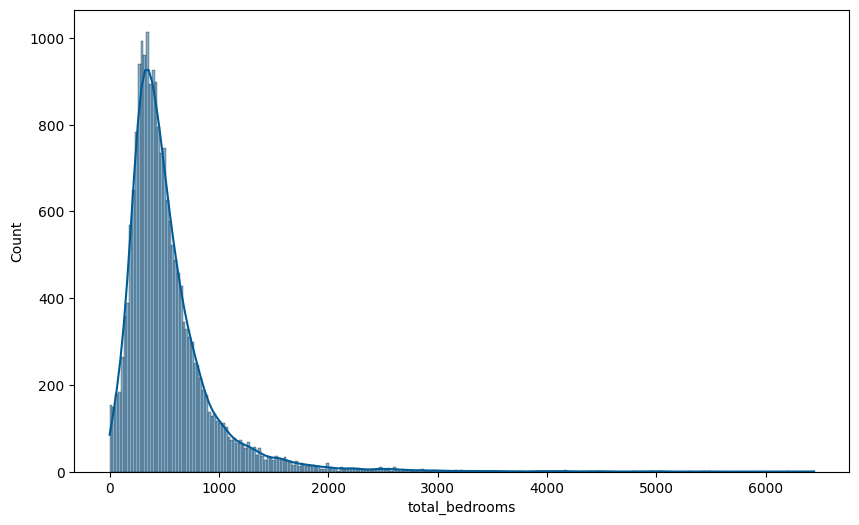

In [168]:
# histogram with a KDE plot for the 'total_bedrooms' column from the DataFrame
plt.figure(figsize= (10, 6))
sns.histplot(df['total_bedrooms'], color = '#005b96', kde= True);

#It is skewed, therefore we will fill missing values with median number of rooms.

In [169]:
#Using median room count to replace missing values

# Calculate the median of the 'total_bedrooms' column
median_value = df['total_bedrooms'].median()

# Replace missing values with the median
df['total_bedrooms'].fillna(median_value, inplace=True)

In [170]:
#Print the contents of ocean_proximity
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [171]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [201]:
#checking outliers
z = np.abs(stats.zscore(df['housing_median_age']))
print(z)

0        0.982143
1        0.607019
2        1.856182
3        1.856182
4        1.856182
           ...   
20635    0.289187
20636    0.845393
20637    0.924851
20638    0.845393
20639    1.004309
Name: housing_median_age, Length: 20640, dtype: float64


#EDA for housing prices

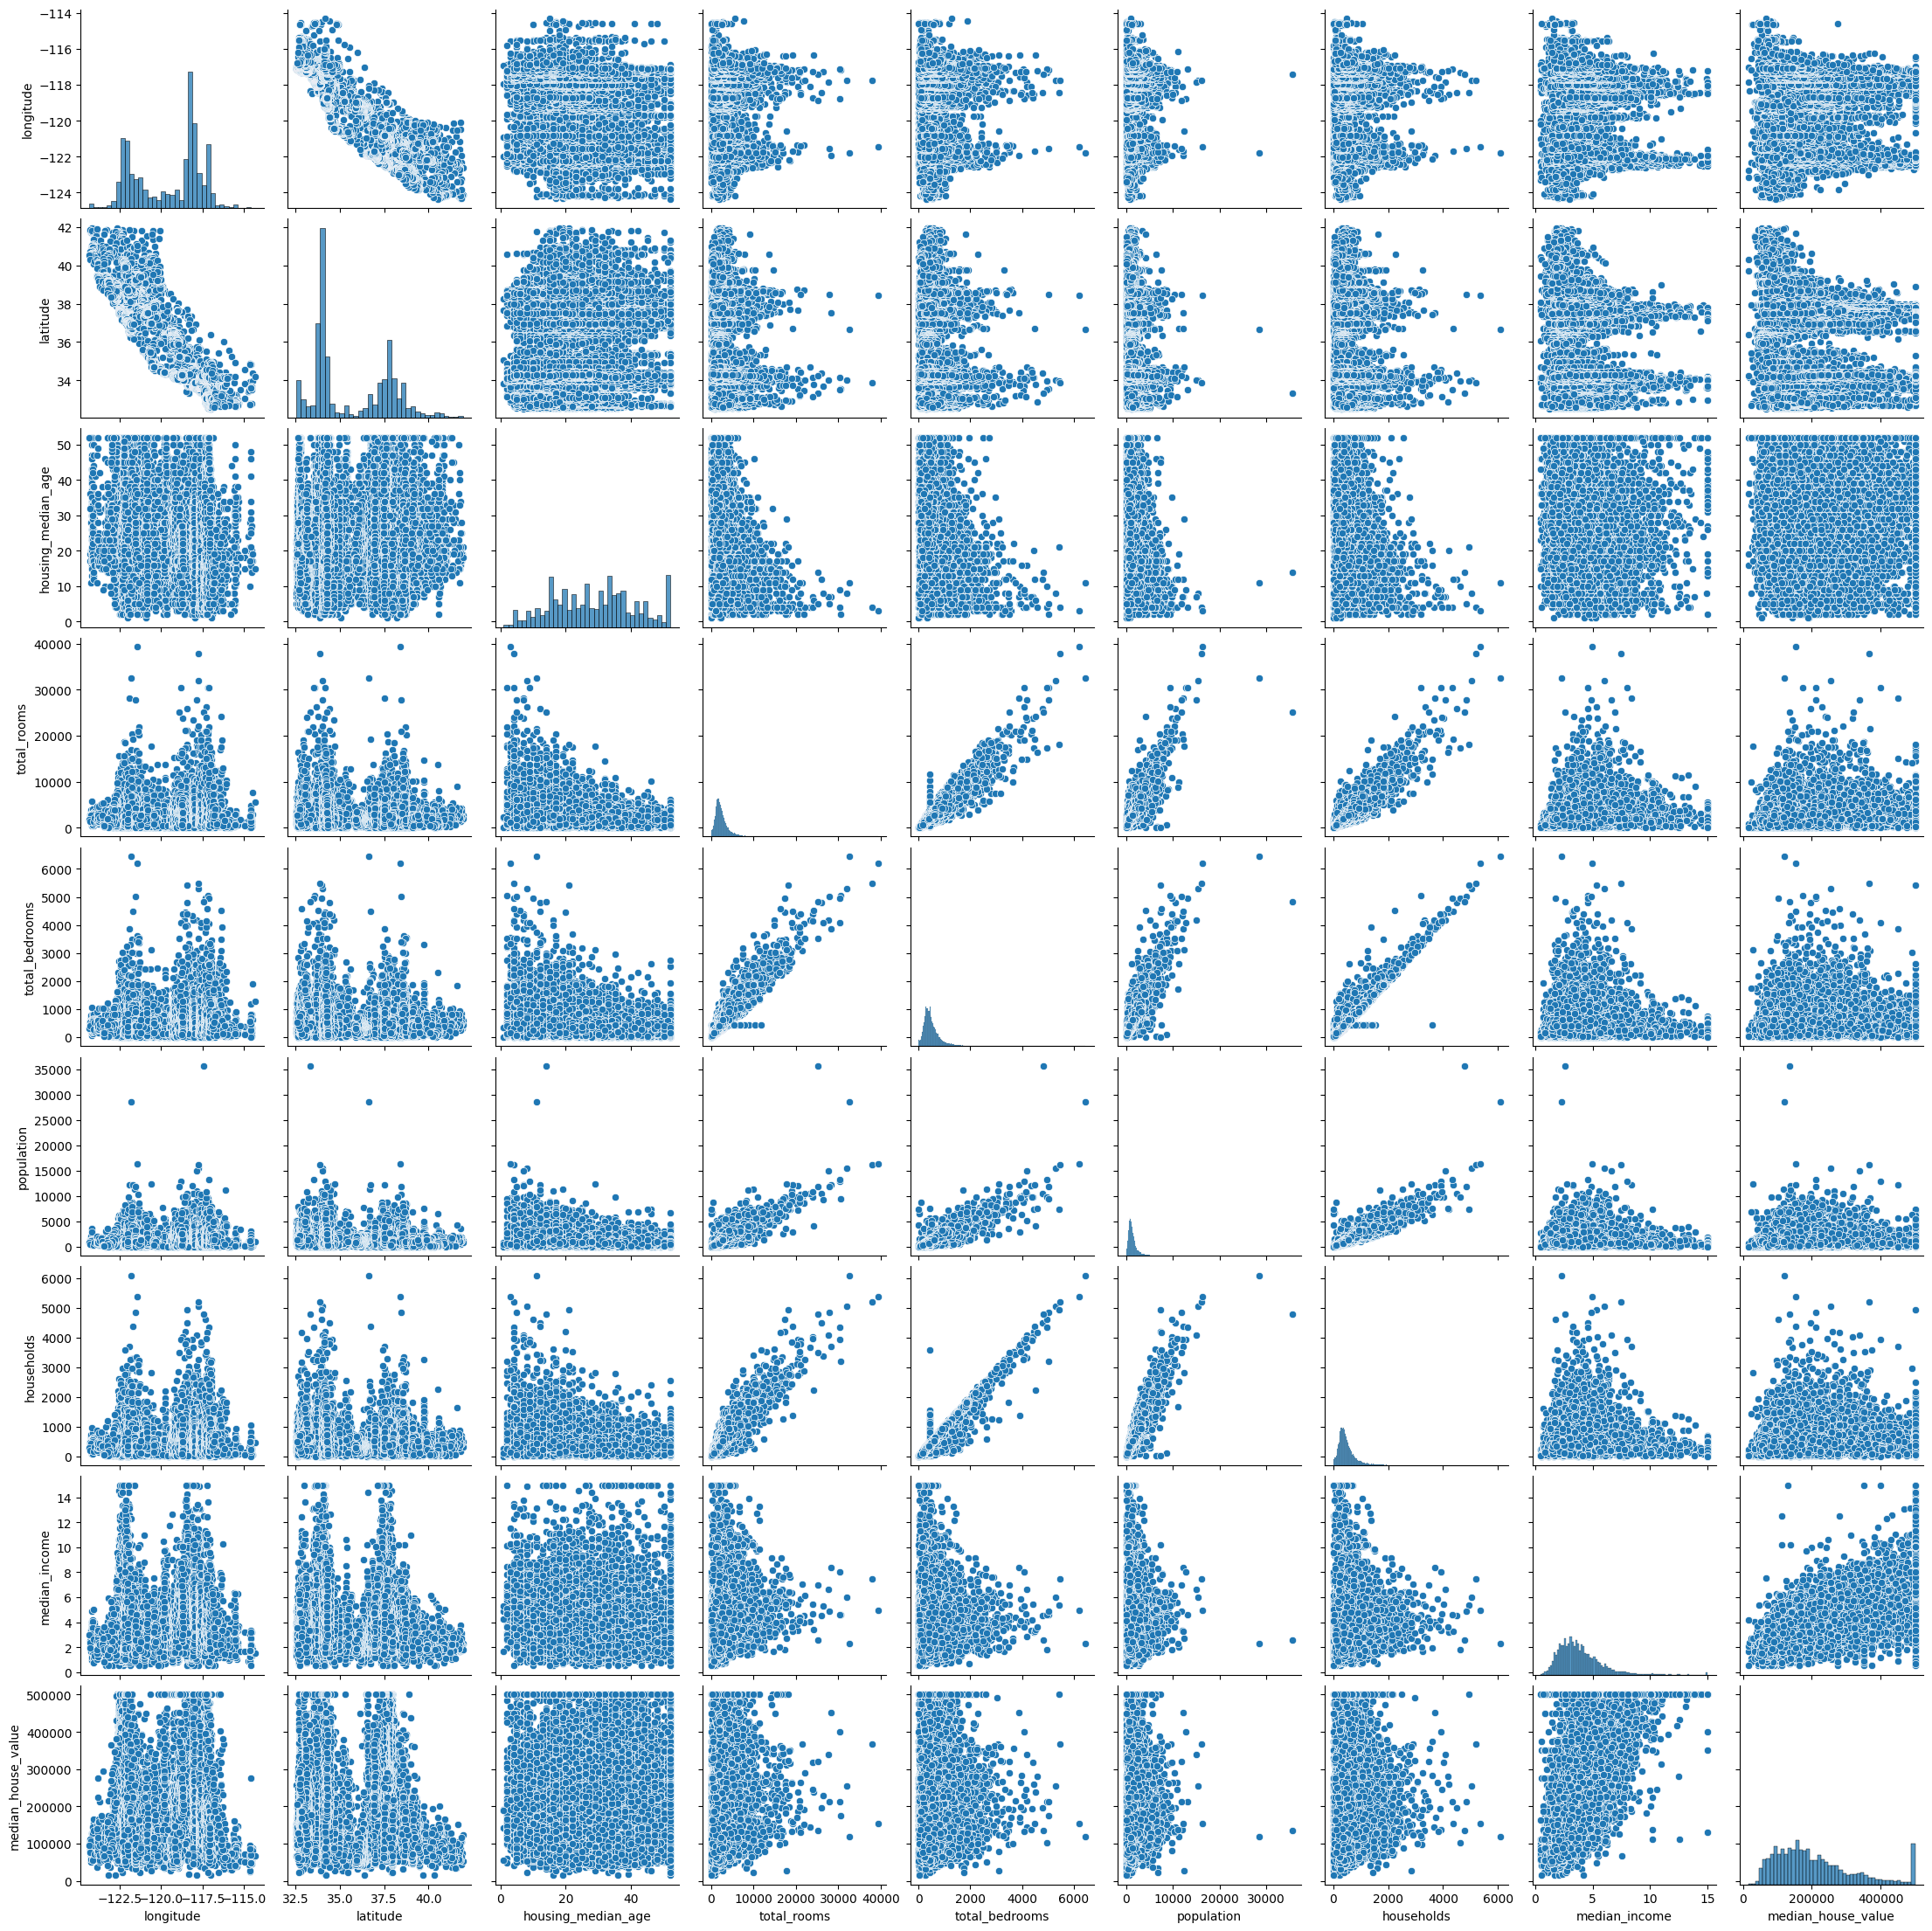

In [172]:
# Insights into the relationships between different variables in a dataset
sns.pairplot(df)

<ipython-input-173-0608869c1534>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, cmap='YlGnBu')


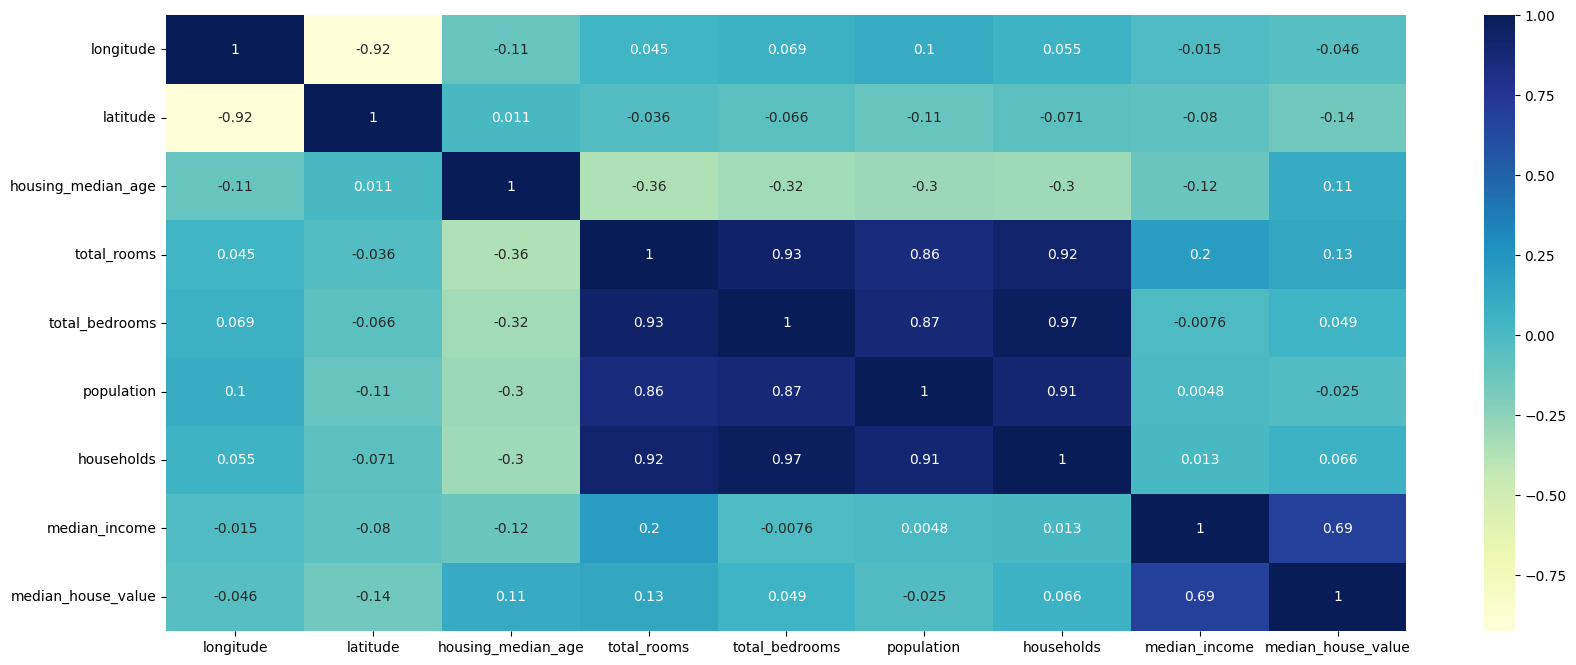

In [173]:
#Plotting heatmap to visualize the correlation matrix, where each cell represents the correlation coefficient between two variables.
plt.figure(figsize= (20, 8))
sns.heatmap(df.corr(), annot= True, cmap='YlGnBu')
plt.show()

## Median income is the important feature.

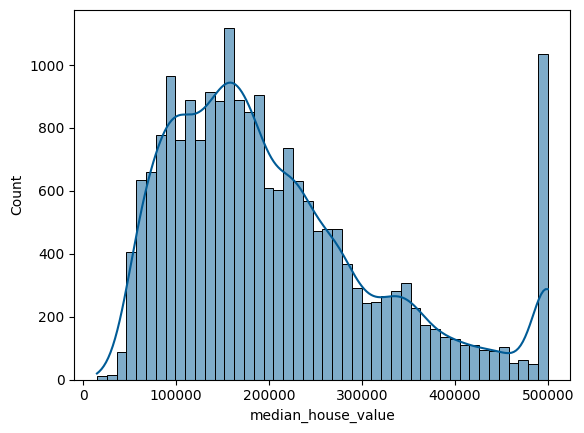

In [174]:
sns.histplot(df['median_house_value'], color = '#005b96', kde= True);

In [175]:
df['median_house_value'].skew()

# If skewness is 0, the data is perfectly symmetrical.
# If skewness is greater than 0, the data is skewed to the right (positively skewed), meaning that the right tail is longer or fatter than the left.
# If skewness is less than 0, the data is skewed to the left (negatively skewed), indicating that the left tail is longer or fatter than the right.

#Right skewed distribution: The majority of the house values are concentrated towards the lower end. There is a long right tail, indicating the presence of relatively few houses with much higher values.

0.9777632739098341

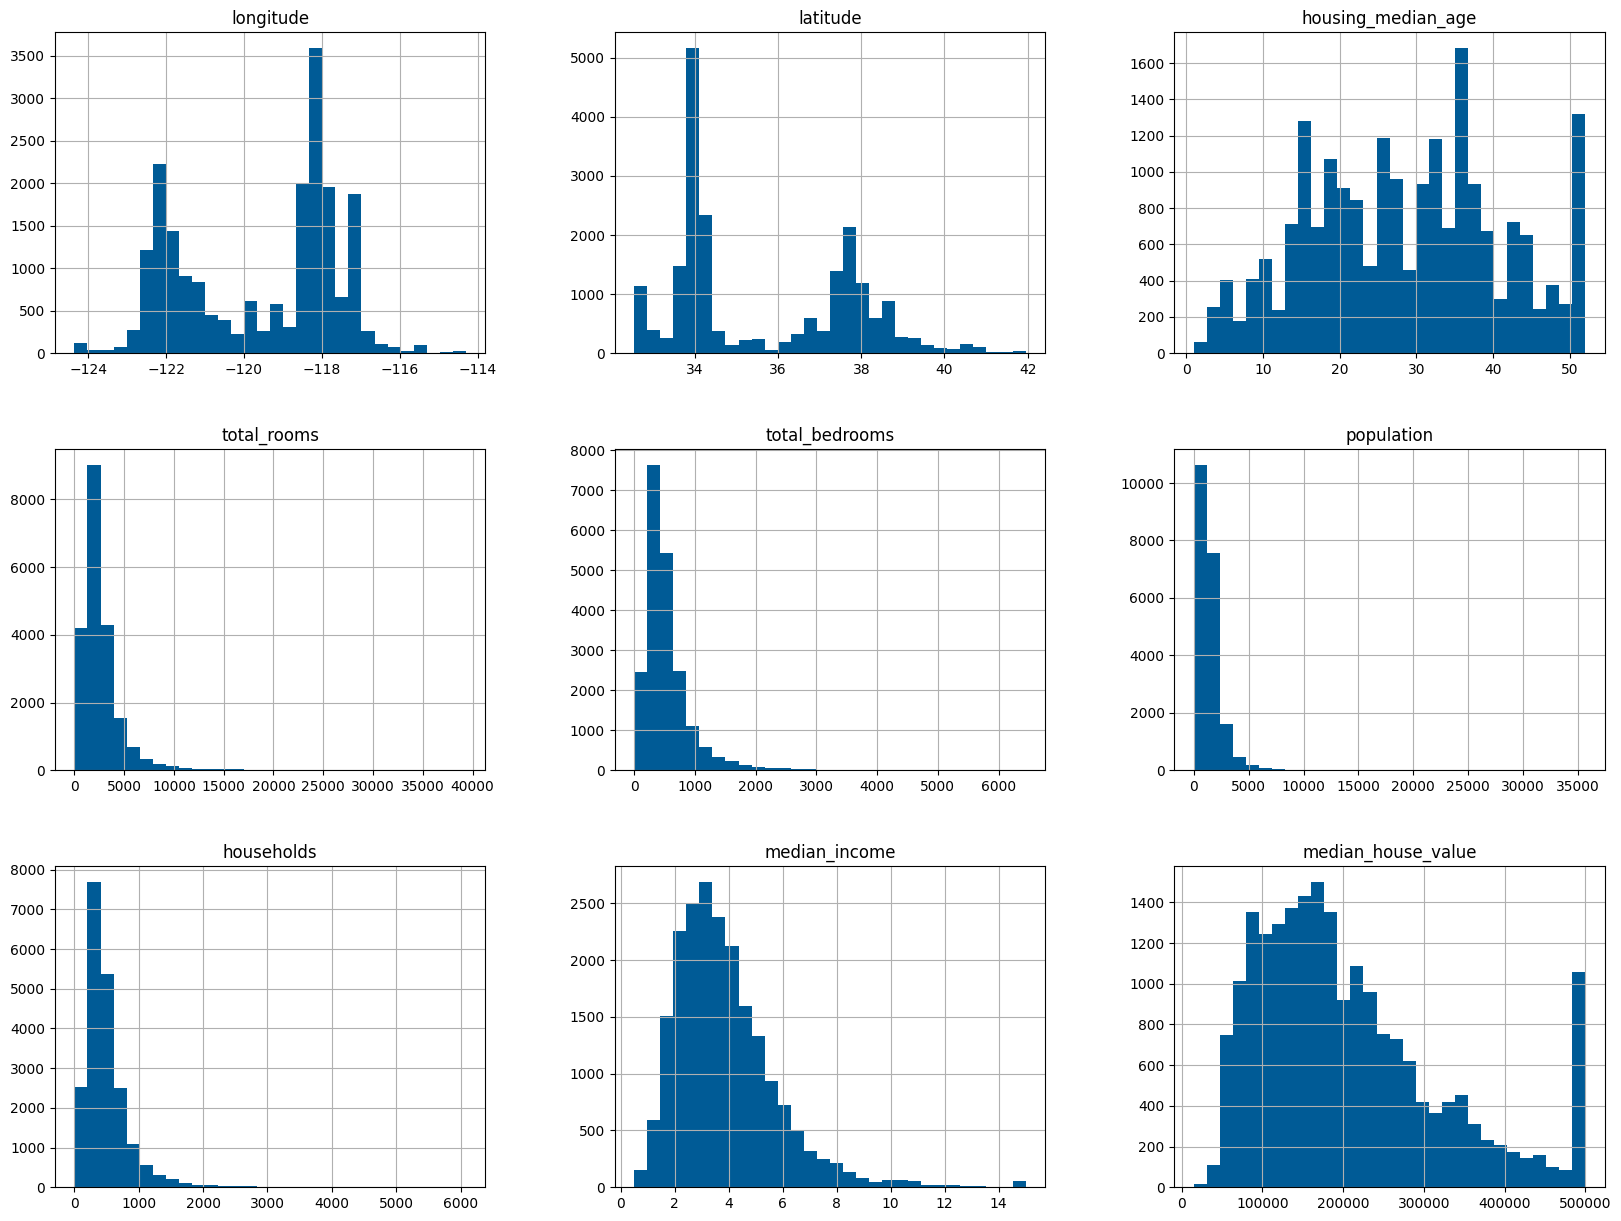

In [176]:
df.hist(bins = 30, figsize=(20, 15), color = '#005b96');

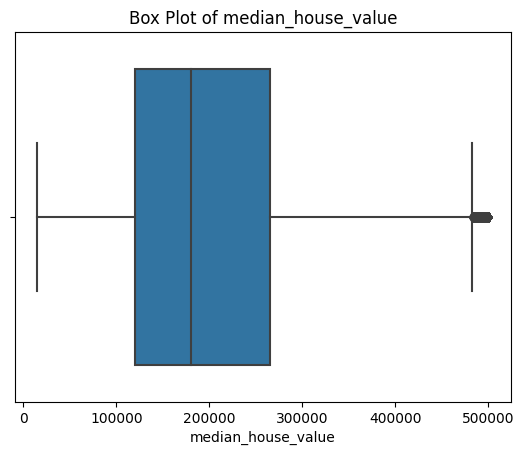

In [177]:
sns.boxplot(x=df['median_house_value'])
plt.title('Box Plot of median_house_value')
plt.show()

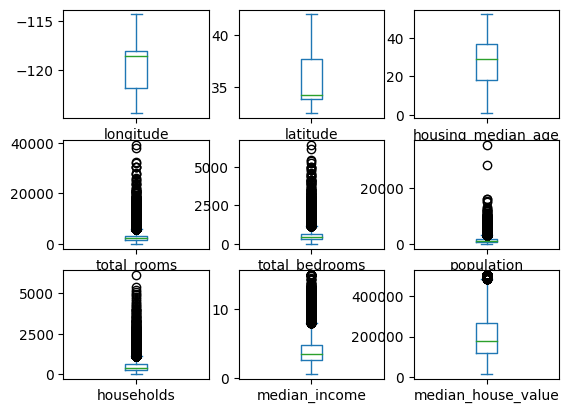

In [178]:
#Identifying the outliers.
df.plot(kind="box", subplots = True, layout = (3,3))
plt.show()

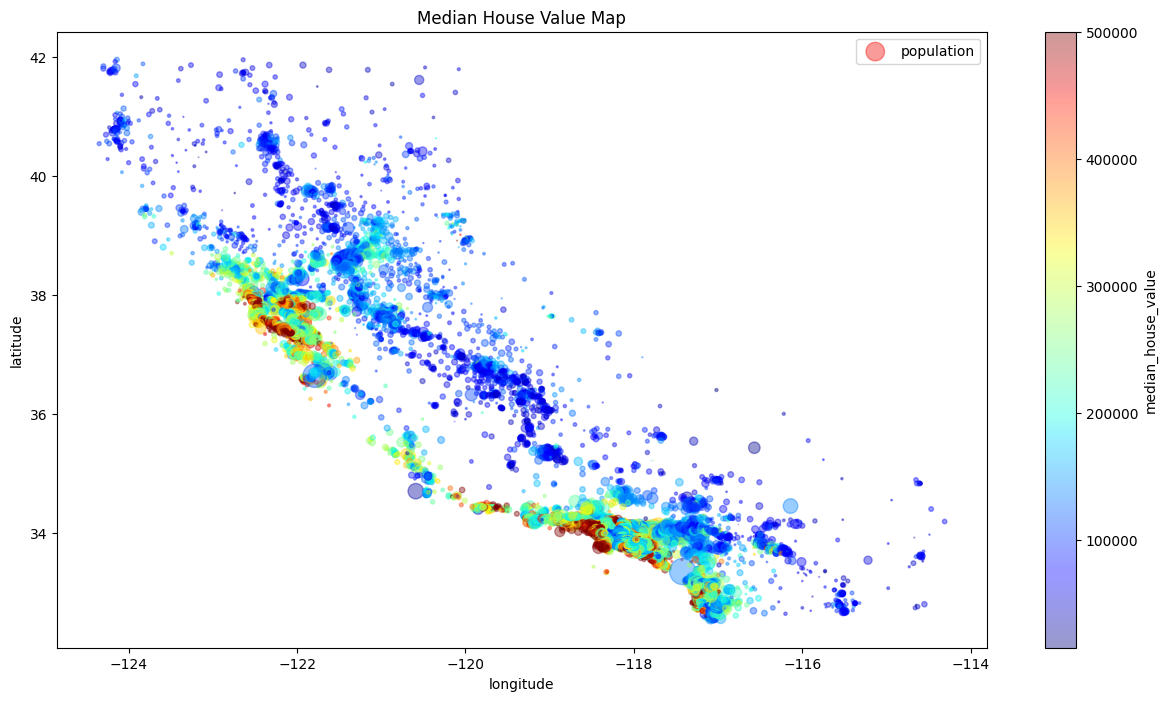

In [179]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=df["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    )
plt.legend()
plt.title('Median House Value Map')
plt.show()


In [190]:
#Extracts the features (independent variables) from the DataFrame, excluding 'median_house_value'

x=df.drop("median_house_value",axis=1)

#Extracts the target variable (dependent variable) from the DataFrame
y=df[['median_house_value']]

#Modeling Data

#Encoding values

In [191]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [202]:
X= df.iloc[:, :11]
X.drop("median_house_value", axis=1, inplace=True)
X = X.values

y= df.iloc[:, 8:9].values

In [203]:
X

array([[-122.23, 37.88, 41.0, ..., 126.0, 8.3252, 'NEAR BAY'],
       [-122.22, 37.86, 21.0, ..., 1138.0, 8.3014, 'NEAR BAY'],
       [-122.24, 37.85, 52.0, ..., 177.0, 7.2574, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17.0, ..., 433.0, 1.7, 'INLAND'],
       [-121.32, 39.43, 18.0, ..., 349.0, 1.8672, 'INLAND'],
       [-121.24, 39.37, 16.0, ..., 530.0, 2.3886, 'INLAND']], dtype=object)

one hot encoder to make a new binary column with dummy variables

In [204]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [205]:
X

array([[0.0, 0.0, 0.0, ..., 322.0, 126.0, 8.3252],
       [0.0, 0.0, 0.0, ..., 2401.0, 1138.0, 8.3014],
       [0.0, 0.0, 0.0, ..., 496.0, 177.0, 7.2574],
       ...,
       [0.0, 1.0, 0.0, ..., 1007.0, 433.0, 1.7],
       [0.0, 1.0, 0.0, ..., 741.0, 349.0, 1.8672],
       [0.0, 1.0, 0.0, ..., 1387.0, 530.0, 2.3886]], dtype=object)

In [206]:
x.shape, y.shape

((20640, 9), (20640, 1))

Train test split

In [208]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size= 0.3, random_state=1)

#Feature scaling

In [209]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [210]:
X_test.shape

(6192, 13)

#Linear Regression

In [211]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [212]:
#Predict the median_house_value
y_pred= reg.predict(X_test)
y_pred

array([[242755.83680025],
       [ 93264.41264615],
       [248236.22852281],
       ...,
       [191429.36941566],
       [178323.27550468],
       [172723.05493616]])

#ANN

In [213]:
import tensorflow as tf
ann=tf.keras.models.Sequential()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [214]:
# Defining the architecture of ANN
model= Sequential()
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))

In [215]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [216]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
452/452 [==============================] - 3s 4ms/step - loss: 56116506624.0000 - val_loss: 52470075392.0000
Epoch 2/100
452/452 [==============================] - 2s 3ms/step - loss: 34078300160.0000 - val_loss: 11821993984.0000
Epoch 3/100
452/452 [==============================] - 1s 3ms/step - loss: 9027883008.0000 - val_loss: 7996126208.0000
Epoch 4/100
452/452 [==============================] - 1s 3ms/step - loss: 7312946688.0000 - val_loss: 7134035456.0000
Epoch 5/100
452/452 [==============================] - 1s 3ms/step - loss: 6601203200.0000 - val_loss: 6592693248.0000
Epoch 6/100
452/452 [==============================] - 1s 3ms/step - loss: 6119338496.0000 - val_loss: 6143289344.0000
Epoch 7/100
452/452 [==============================] - 1s 3ms/step - loss: 5767723008.0000 - val_loss: 5877622784.0000
Epoch 8/100
452/452 [==============================] - 1s 3ms/step - loss: 5508594688.0000 - val_loss: 5618674688.0000
Epoch 9/100
452/452 [=======================

In [217]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

194/194 [==============================] - 0s 2ms/step - loss: 4315995648.0000
Test Loss: 4315995648.0


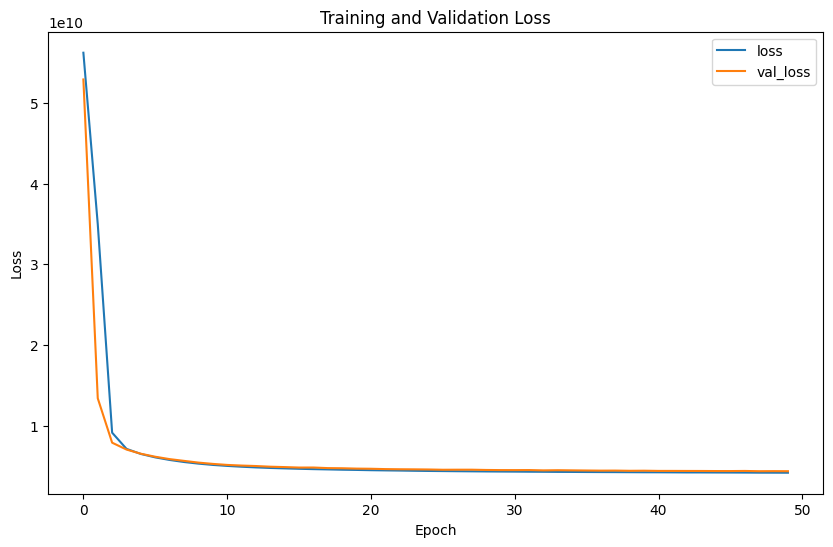

In [218]:
#plot the training loss over epochs
#It visually assesses how the loss (error) changes during the training process.

loss_df = pd.DataFrame(history.history)

loss_df.plot(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [219]:
test_predict=model.predict(X_test) #test_predictions = model.predict(X_test) is used to obtain predictions from a trained model on a test set (X_test)
test_predict #print the predicted values for each example in the test set

194/194 [==============================] - 0s 1ms/step


array([[269828.06 ],
       [ 77060.875],
       [228755.23 ],
       ...,
       [187309.3  ],
       [128593.8  ],
       [175414.7  ]], dtype=float32)

In [220]:
test_predict=pd.Series(test_predict.reshape(6192,))

In [221]:
pred_df= pd.DataFrame(y_test, columns=["Test True Y"])
pred_df

,Test True Y
0,355000.0
1,70700.0
2,229400.0
3,112500.0
4,225400.0
...,...
6187,211300.0
6188,87500.0
6189,109800.0
6190,162500.0


In [223]:
pred_df= pd.concat([pred_df,test_predict], axis=1)

In [224]:
pred_df.columns=["Test True Y", "Model Predictions"]
pred_df

,Test True Y,Model Predictions
0,355000.0,269828.062500
1,70700.0,77060.875000
2,229400.0,228755.234375
3,112500.0,176149.156250
4,225400.0,299312.843750
...,...,...
6187,211300.0,233771.515625
6188,87500.0,117054.726562
6189,109800.0,187309.296875
6190,162500.0,128593.796875


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

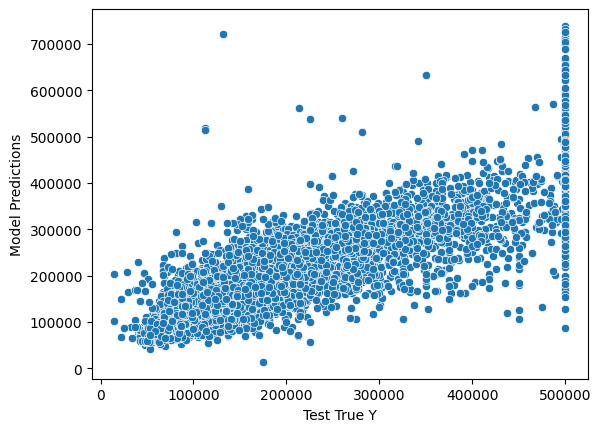

In [225]:
sns.scatterplot(x="Test True Y", y="Model Predictions", data=pred_df)

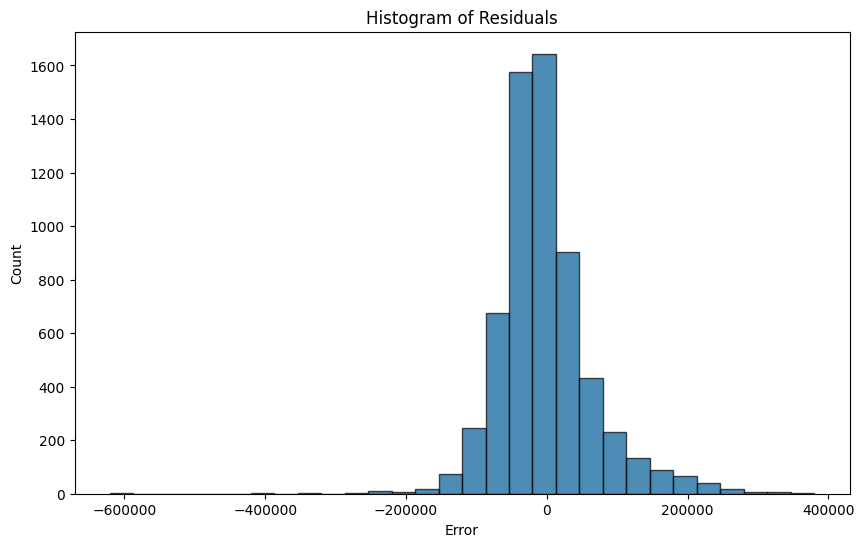

In [237]:
# After training our model and obtained predictions on the test set, we calculate residuals.
# The provided code is creating a histogram of the residuals, which represent the differences between the true values (y_test) and the predicted values (test_predictions)

# Calculate residuals
residuals = y_test - test_predictions

# Create a DataFrame for predictions and residuals
pred_df = pd.DataFrame({
    "Test True Y": y_test.flatten(),  # Assuming y_test is a 2D array, flatten it to 1D
    "Model Predictions": test_predictions.flatten(),  # Flatten predictions to 1D
    "Residuals": residuals.flatten()  # Flatten residuals to 1D
})

# Plot the histogram of residuals using plt
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='#005b96', edgecolor='black', alpha=0.7)
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Histogram of Residuals')
plt.show()